<a href="https://colab.research.google.com/github/AriasDenice/Actividad_antioxidante_guayusa/blob/main/ABTSAnova_y_tukey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#conectas Drive con colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/script_Guayusa/IC50_R.xlsx"
data_TEAC = pd.read_excel(path)
data_TEAC


,Edad,Luz,Chakra,IC50,TEAC
0,T0,-,A,206.990859,0.129860
1,T0,-,A,214.184938,0.125498
2,T0,-,A,220.594010,0.121852
3,T0,+,A,334.229382,0.080423
4,T0,+,A,253.255207,0.106137
5,T0,+,A,252.328485,0.106527
6,T1,-,A,164.141666,0.163760
7,T1,-,A,168.786435,0.159254
8,T1,-,A,174.220602,0.154286
9,T1,+,A,139.331890,0.192920


#Anova

In [ ]:
import statsmodels.api as sm


Mínimos cuadrados ordinarios
https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS


Mesa Anova para uno o más modelos lineales ajustados.
https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html

In [ ]:
formula = 'TEAC ~  Chakra +  Edad + Luz'

model = sm.formula.ols(formula, data= data_TEAC).fit()
aov_table =  sm.stats.anova_lm(model,typ=1)
aov_table



,df,sum_sq,mean_sq,F,PR(>F)
Chakra,2.0,0.061053,0.030527,28.283803,7.660512e-09
Edad,2.0,0.022886,0.011443,10.602515,1.536335e-04
Luz,1.0,0.000007,0.000007,0.006721,9.350032e-01
Residual,48.0,0.051806,0.001079,NaN,NaN


Interactions and ANOVA
https://www.statsmodels.org/dev/examples/notebooks/generated/interactions_anova.html

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   TEAC   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.38e-09
Time:                        05:28:28   Log-Likelihood:                 111.01
No. Observations:                  54   AIC:                            -210.0
Df Residuals:                      48   BIC:                            -198.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1367      0.011     12.486      

#Mastering ANOVA in Python: A Step-by-Step Guide
https://www.reneshbedre.com/blog/anova.html

#Pruebas de Normalidad en Python

##Prueba de Shapiro–Wilk

https://www.youtube.com/watch?v=hXonZjU9BWo&t=184s

In [ ]:
import seaborn as sns
from scipy import stats as sts


In [ ]:
w, p= sts.shapiro(model.resid)
print('w=%.3f, p_value=%.3f' % (w, p))

w=0.952, p_value=0.031


#Levene test for homogeneity of variance
https://ethanweed.github.io/pythonbook/05.05-anova2.html#assumption-checking

In [ ]:
!pip install pingouin
import pingouin as pg


In [ ]:
data_TEAC['interaction'] = data_TEAC['Chakra']+data_TEAC['Luz']+data_TEAC['Edad']

pg.homoscedasticity(data=data_TEAC,
                    dv='TEAC',
                    group='interaction').round(5)

,W,pval,equal_var
levene,0.74038,0.7426,True


#Assumption of independence:

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

#How to Use abline Function in Matplotlib
https://www.statology.org/matplotlib-abline/

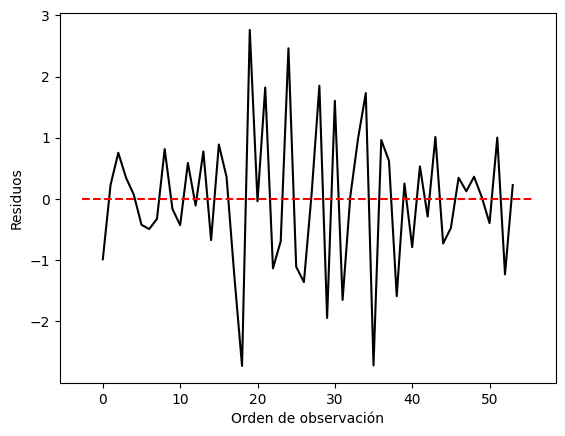

In [ ]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='red')
residual= model.resid
#abline(h=0,col="red")
plt.plot(residual, color='black')
plt.xlabel('Orden de observación')
plt.ylabel('Residuos')
abline(0, 0)
plt.show()

# Durbin-Watson Test
https://www.statology.org/tukey-test-python/

In [ ]:
from statsmodels.stats.stattools import durbin_watson as dwtest

import numpy as np

dwtest(resids=np.array(model.resid))

2.1137056934246634

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# perform Tukey's test
#Comparacion Chakra
tukey_Ch = pairwise_tukeyhsd(endog=data_TEAC['TEAC'],
                          groups=data_TEAC['Chakra'],
                          alpha=0.05)
#Comparacion age_category
tukey_Ac = pairwise_tukeyhsd(endog=data_TEAC['TEAC'],
                          groups=data_TEAC['age_category'],
                          alpha=0.05)
#Comparacion light_condition
tukey_Lc = pairwise_tukeyhsd(endog=data_TEAC['TEAC'],
                          groups=data_TEAC['light_condition'],
                          alpha=0.05)
#Comparacion Chakra:light_condition
data_hplc['interaction_Ch_Lc'] = data_TEAC['Chakra']+data_TEAC['light_condition']
tukey_Ch_Lc = pairwise_tukeyhsd(endog=data_TEAC['TEAC'],
                          groups=data_TEAC['interaction_Ch_Lc'],
                          alpha=0.05)
#Comparacion Chakra:age_category
data_hplc['interaction_Ch_Ac'] = data_TEAC['Chakra']+data_TEAC['age_category']
tukey_Ch_Ac = pairwise_tukeyhsd(endog=data_TEAC['TEAC'],
                          groups=data_TEAC['interaction_Ch_Ac'],
                          alpha=0.05)
#Comparacion light_condition:age_category
data_hplc['interaction_Lc_Ac'] = data_TEAC['light_condition']+data_TEAC['age_category']
tukey_Lc_Ac = pairwise_tukeyhsd(endog=data_TEAC['TEAC],
                          groups=data_TEAC['interaction_Lc_Ac'],
                          alpha=0.05)
#Comparacion Chakra:light_condition:age_category
data_hplc['interaction_all'] = data_hplc['Chakra']+data_TEAC['light_condition']+data_TEAC['age_category']
tukey_all = pairwise_tukeyhsd(endog=data_TEAC['TEAC'],
                          groups=data_TEAC['interaction_all'],
                          alpha=0.05)

#display results
#Comparacion Chakra
print(tukey_Ch)
#Comparacion age_category
print(tukey_Ac)
#Comparacion light_condition
print(tukey_Lc)
#Comparacion Chakra:light_condition
print(tukey_Ch_Lc)
#Comparacion Chakra:age_category
print(tukey_Ch_Ac)
#Comparacion light_condition:age_category
print(tukey_Lc_Ac)
#Comparacion Chakra:light_condition:age_category
print(tukey_all)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B    -43.0 0.2331 -108.2304  22.2304  False
     A      C  28.9625 0.4977  -36.2679  94.1929  False
     B      C  71.9625 0.0299    6.7321 137.1929   True
-------------------------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
    T0     T1 -40.3958 0.3641  -115.165 34.3733  False
    T0     T2 -42.1662 0.3348 -116.9353  32.603  False
    T1     T2  -1.7703 0.9979  -76.5395 72.9988  False
------------------------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     +      - -48.8837 0.0373 -94.5147 -3.2526   True
-------

In [ ]:
import plotly.express as px


In [3]:
vis_dt= data_TEAC.drop(columns= 'TEAC')
px.parallel_coordinates(data_frame= vis_dt, color='TEAC' )

NameError: name 'data_TEAC' is not defined

In [ ]:
pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.13.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.5
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cy